<h2>Data Cleaning </h2>

<h3>Problem Statement: </h3>

To perform data analysis and cleaning for comprehensive data analysis through data visualizations.

First, let's import the required libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Now, I'll be importing the flipkart book data which I had scraped from the flipkart website:

In [2]:
df = pd.read_csv(r"C:\Users\nakausha\Downloads\projects\flipkart-webscraping\flipkart_books.csv")

Great! Now, let's check to see the structure of our data:

In [3]:
df.head()

,Unnamed: 0,name,type,rating,number_of_ratings,final_price,original_price,discount
0,0,Ethics (Hindi) - Nitishastra with 1 Disc,"Hindi, Paperback, Sunil Agrahari",4.4,150,449,560,19
1,1,A Naturalist's Guide To The Reptiles Of India,"English, Paperback, Das Indraneil",4.3,30,317,499,36
2,2,Think Like a Monk - Train Your Mind for Peace ...,"English, Paperback, Jay Shetty",4.8,807,388,499,22
3,3,25 Years UPSC IAS/ IPS Prelims Topic-wise Solv...,"English, Paperback, Disha Experts, Mrunal Patel",4.5,16860,271,525,48
4,4,Word Power Made Easy,"Paperbook, Norman Lewis",4.3,808,170,399,57


Removing the redundant index column in 3..2..1..

In [4]:
df = df.drop(columns = 'Unnamed: 0')

Again, let's print and have a look at the dataframe and its features:

In [5]:
df.head()

,name,type,rating,number_of_ratings,final_price,original_price,discount
0,Ethics (Hindi) - Nitishastra with 1 Disc,"Hindi, Paperback, Sunil Agrahari",4.4,150,449,560,19
1,A Naturalist's Guide To The Reptiles Of India,"English, Paperback, Das Indraneil",4.3,30,317,499,36
2,Think Like a Monk - Train Your Mind for Peace ...,"English, Paperback, Jay Shetty",4.8,807,388,499,22
3,25 Years UPSC IAS/ IPS Prelims Topic-wise Solv...,"English, Paperback, Disha Experts, Mrunal Patel",4.5,16860,271,525,48
4,Word Power Made Easy,"Paperbook, Norman Lewis",4.3,808,170,399,57


In [6]:
print("Shape of DataFrame: {}".format(df.shape))

Shape of DataFrame: (1007, 7)


In [7]:
df.describe()

,rating,number_of_ratings,final_price,original_price,discount
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,4.371400,1553.373386,347.646475,504.901688,26.476663
std,0.191977,3575.178018,292.309611,443.504317,15.550252
min,3.400000,3.000000,12.000000,15.000000,1.000000
25%,4.300000,107.000000,180.000000,242.500000,15.000000
50%,4.400000,425.000000,279.000000,395.000000,25.000000
75%,4.500000,1303.500000,428.000000,599.000000,36.000000
max,5.000000,32855.000000,4379.000000,5250.000000,76.000000


The type columns seems to have too much information under one name. I will split it into three seperate columns: "Language", "Author", and "Bind" to signify the language, author name, and bind of the books respectively.

In [8]:
#splitting the data into three parts:
type_0 = [y[0] for y in [x for x in df['type'].str.split(',')]]
type_1 = [y[1] for y in [x for x in df['type'].str.split(',')]] 
type_2 = []
for i in df['type'].str.split(','):
    try:
        type_2.append(i[2])
    except:
        type_2.append("0")

I'm going to do have to do some manual work now. I will print the unique values present in the list to find out the language names and the bind names being used and split them.

In [9]:
np.unique(type_0)

array(['Bengali', 'English', 'Fine Paperback', 'Gujarati', 'HARD BOND',
       'HARD BOOK', 'HARDBOOK', 'Hardbook', 'Hardcover', 'Hindi',
       'IMITATION LEATHER', 'Kannada', 'MADE EASY Publications',
       'Malayalam', 'Marathi', 'Others', 'PAPAERBACK', 'PAPARBACK',
       'PAPERBAGE', 'PAPERBOOK', 'PAPERBSCK', 'PAPERPACK', 'PAPERRBACK',
       'PEPARBACK', 'Papar Back', 'Papeback', 'Paper black', 'Paperback',
       'Paperbeck', 'Paperbook', 'Punjabi', 'SPIRAL BOUND', 'Tamil',
       'Telugu', 'YES', 'hardbook', 'pagemaker'], dtype='<U22')

In [10]:
lang = ['Bengali', 'English', 'Gujarati', 'Hindi', 'Kannada', 'Malayalam', 'Marathi', 'Punjabi', 'Tamil', 'Telugu']

In [11]:
bind = list(np.unique([x for x in type_0 if x not in lang]))

Now, let's start by creating the new columns and inputting data into these.

In [12]:
i=0
for x in type_0:
    if x in lang:
        df.loc[i,'language'] = x
    i+=1

Checking for null values in "Language" column:

In [13]:
df['language'].isna().sum()

438

Woah too many null values. I'll address those later. Now, let's move on to inputting the values in the "Bind" column.

In [14]:
i=0
for x in type_0:
    if x.strip() in bind:
        df.loc[i,'bind'] = x.strip()
    i+=1
i=0
for x in type_1:
    if x.strip() in bind:
        df.loc[i,'bind'] = x.strip()
    i+=1
i=0
for x in type_2:
    if x.strip() in bind:
        df.loc[i,'bind'] = x.strip()
    i+=1

Checking for null values in "Bind" column:

In [15]:
df['bind'].isna().sum()

39

Much better than "Languages". I will address these too. Moving on to inputting the "Author" column:

In [16]:
author = lang+bind+["0"] #setting variable to define names which are not author names

Inputting values in the "Author" column:

In [17]:
i=0
for x in type_0:
    if x.strip() not in author:
        df.loc[i,'author'] = x.strip()
    i+=1
i=0
for x in type_1:
    if x.strip() not in author:
        df.loc[i,'author'] = x.strip()
    i+=1
i=0
for x in type_2:
    if x.strip() not in author:
        df.loc[i,'author'] = x.strip()
    i+=1

In [18]:
df['author'].isna().sum()

0

Great! All Author names are available. Now, let's take a look at the new data:

In [19]:
df

,name,type,rating,number_of_ratings,final_price,original_price,discount,language,bind,author
0,Ethics (Hindi) - Nitishastra with 1 Disc,"Hindi, Paperback, Sunil Agrahari",4.4,150,449,560,19,Hindi,Paperback,Sunil Agrahari
1,A Naturalist's Guide To The Reptiles Of India,"English, Paperback, Das Indraneil",4.3,30,317,499,36,English,Paperback,Das Indraneil
2,Think Like a Monk - Train Your Mind for Peace ...,"English, Paperback, Jay Shetty",4.8,807,388,499,22,English,Paperback,Jay Shetty
3,25 Years UPSC IAS/ IPS Prelims Topic-wise Solv...,"English, Paperback, Disha Experts, Mrunal Patel",4.5,16860,271,525,48,English,Paperback,Disha Experts
4,Word Power Made Easy,"Paperbook, Norman Lewis",4.3,808,170,399,57,NaN,Paperbook,Norman Lewis
...,...,...,...,...,...,...,...,...,...,...
1002,The Origin of Species,"English, Paperback, Darwin Charles",4.5,2180,196,225,12,English,Paperback,Darwin Charles
1003,Objective NCERT at your Fingertip Biology XI-X...,"Hindi, Paperback, MTG Editorial Board",4.3,503,614,800,23,Hindi,Paperback,MTG Editorial Board
1004,Post Graduate Entrance Examination Commerce,"English, Paperback, Arihant Experts",4.3,175,147,205,28,English,Paperback,Arihant Experts
1005,Chemistry Part 1 Class XI,"English, Paperback, unknown",4.2,1855,178,190,6,English,Paperback,unknown


Generating a heat map to visualize the presence of null values:

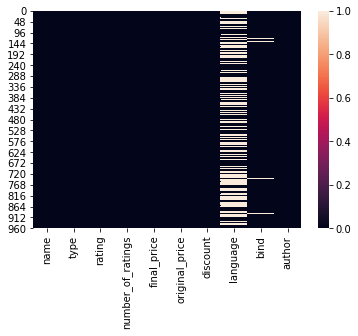

In [20]:
sns.heatmap(df.isna())

Of all the languages added, it is quite possible that English would be the dominant language. Let's verify this:

In [21]:
print("Books in English = {} %".format((int(sum(df['language']=='English')))*100/(int(df['language'].shape[0])-int(sum(df['language'].isna())))))

Books in English = 80.31634446397189 %


Since 80% of the books were in English language, we can set the missing language names to English:

In [22]:
df.loc[df['language'].isna(),'language']='English'

Checking the heat map now:

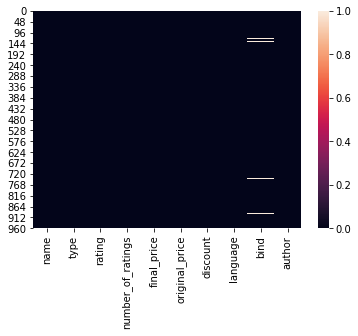

In [23]:
sns.heatmap(df.isna())

Now, some of the bind names are missing. Let's take a look at the "Bind" column:

In [24]:
df['bind'].unique()

array(['Paperback', 'Paperbook', 'Fine Paperback',
       'MADE EASY Publications', nan, 'Hardcover', 'pagemaker',
       'hardbook', 'PAPARBACK', 'PAPERBAGE', 'HARD BOOK', 'Others',
       'HARDBOOK', 'IMITATION LEATHER', 'PAPERPACK', 'PAPERBSCK',
       'PAPERBOOK', 'Papeback', 'PAPERRBACK', 'PAPAERBACK', 'Paper black',
       'YES', 'SPIRAL BOUND', 'Paperbeck', 'PEPARBACK', 'HARD BOND',
       'Papar Back'], dtype=object)

There seems to be a descrepency in the bind names, most of them are spelling errors.

In [25]:
df['bind'] = df['bind'].replace(['PaperBack','Paperbook','PAPARBACK','PAPERBAGE','PAPERPACK','PAPERBSCK','PAPERBOOK','Papeback','PAPERRBACK','PAPAERBACK','Paper black','Paperbeck','PEPARBACK','Papar Back','Fine Paperback','pagemaker'], 'Paperback')
df['bind'] = df['bind'].replace(['HARD BOOK','HARD BOND','hardbook','HARDBOOK'], 'Hardcover')

Let's check now:

In [26]:
df['bind'].unique()

array(['Paperback', 'MADE EASY Publications', nan, 'Hardcover', 'Others',
       'IMITATION LEATHER', 'YES', 'SPIRAL BOUND'], dtype=object)

It seems that the bind section will be neat if we classify the bind of the books to three categories: "Paperback", "Hardcover", and "Others". Let's check their distribution:

In [27]:
p = (int(sum(df['bind']=='Paperback')))*100/(int(df['bind'].shape[0])-int(sum(df['bind'].isna())))
print("Paperback Books = {} %".format(p))
h = (int(sum(df['bind']=='Hardcover')))*100/(int(df['bind'].shape[0])-int(sum(df['bind'].isna())))
print("Hardcover books= {} %".format(h))
print("Other books = {} %".format((100-p-h)))

Paperback Books = 94.42148760330579 %
Hardcover books= 4.75206611570248 %
Other books = 0.8264462809917283 %


Based on the distribution above, I'll classify the books other than Paperback and hardcover as "Others":

In [28]:
df['bind'] = df['bind'].replace(['MADE EASY Publications','IMITATION LEATHER', 'YES', 'SPIRAL BOUND'], 'Others')

The 39 empty Bind columns can be set as Paperback seeing that 94% books were Paperback:

In [29]:
df.loc[df['bind'].isna(),'bind'] = 'Paperback'

Let's check the heatmap now:

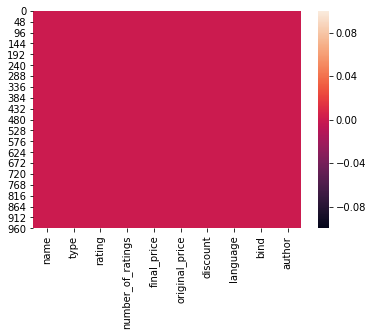

In [30]:
sns.heatmap(df.isna())

It seems safe to drop the "Type" column as it has no use now:

In [31]:
df = df.drop(columns='type')

For a better cleaner visualization, a new column with discount categories (called "Discount Range") can be created as follows:

In [32]:
binInterval = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
binLabels   = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','90-100']
df['discount_range'] = pd.cut(df['discount'], bins = binInterval, labels=binLabels)

Checking if the process did not create any null values in "Discount Range" column:

In [33]:
df['discount_range'].isna().sum()

0

Looks great! Let's finally print the dataframe and export it into a csv file.

In [34]:
df

,name,rating,number_of_ratings,final_price,original_price,discount,language,bind,author,discount_range
0,Ethics (Hindi) - Nitishastra with 1 Disc,4.4,150,449,560,19,Hindi,Paperback,Sunil Agrahari,11-20
1,A Naturalist's Guide To The Reptiles Of India,4.3,30,317,499,36,English,Paperback,Das Indraneil,31-40
2,Think Like a Monk - Train Your Mind for Peace ...,4.8,807,388,499,22,English,Paperback,Jay Shetty,21-30
3,25 Years UPSC IAS/ IPS Prelims Topic-wise Solv...,4.5,16860,271,525,48,English,Paperback,Disha Experts,41-50
4,Word Power Made Easy,4.3,808,170,399,57,English,Paperback,Norman Lewis,51-60
...,...,...,...,...,...,...,...,...,...,...
1002,The Origin of Species,4.5,2180,196,225,12,English,Paperback,Darwin Charles,11-20
1003,Objective NCERT at your Fingertip Biology XI-X...,4.3,503,614,800,23,Hindi,Paperback,MTG Editorial Board,21-30
1004,Post Graduate Entrance Examination Commerce,4.3,175,147,205,28,English,Paperback,Arihant Experts,21-30
1005,Chemistry Part 1 Class XI,4.2,1855,178,190,6,English,Paperback,unknown,1-10


In [35]:
df.to_csv('flipkart_books_cleaned.csv')

<h3>Conclusion: </h3>

The data scraped from the flipkart website was analysed & cleaned for creating effective visualizations.